Importing the Libaries

In [22]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as ny
from lib.bindec import dec_to_bin, bin_to_dec
from PIL import Image
import imageio
import os
from PIL import Image
from numpy import *
from lib.prbg import *
from lib.conversion import *
from lib.encrypt import *

Read the image

In [23]:
pic=cv.imread('Data/ank.jpg',cv.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'original')

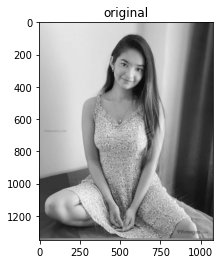

In [24]:
plt.imshow(pic,cmap="gray")
plt.title("original")


In [25]:
height = pic.shape[0]
width = pic.shape[1]
print("height: {}, width: {}".format(height, width))

height: 1350, width: 1080


In [26]:
lst=[]
for i in range (pic.shape[0]):
    for j in range (pic.shape[1]):
        lst.append(ny.binary_repr(pic[i][j], width=8))

In [27]:
# making the 8 bitplanes
bitplane8= (ny.array([int(i[0]) for i in lst] , dtype=ny.uint8)*128).reshape(pic.shape[0],pic.shape[1])
bitplane7= (ny.array([int(i[1]) for i in lst] , dtype=ny.uint8)*64).reshape(pic.shape[0],pic.shape[1])
bitplane6= (ny.array([int(i[2]) for i in lst] , dtype=ny.uint8)*32).reshape(pic.shape[0],pic.shape[1])
bitplane5= (ny.array([int(i[3]) for i in lst] , dtype=ny.uint8)*16).reshape(pic.shape[0],pic.shape[1])
bitplane4= (ny.array([int(i[4]) for i in lst] , dtype=ny.uint8)*8).reshape(pic.shape[0],pic.shape[1])
bitplane3= (ny.array([int(i[5]) for i in lst] , dtype=ny.uint8)*4).reshape(pic.shape[0],pic.shape[1])
bitplane2= (ny.array([int(i[6]) for i in lst] , dtype=ny.uint8)*2).reshape(pic.shape[0],pic.shape[1])
bitplane1= (ny.array([int(i[7]) for i in lst] , dtype=ny.uint8)*1).reshape(pic.shape[0],pic.shape[1])

In [28]:
titles = ['original', 'bitplane8', 'bitplane7', 'bitplane6', 'bitplane5', 'bitplane4', 'bitplane3', 'bitplane2', 'bitplane1']
images = [pic, bitplane8, bitplane7, bitplane6, bitplane5, bitplane4, bitplane3, bitplane2, bitplane1]

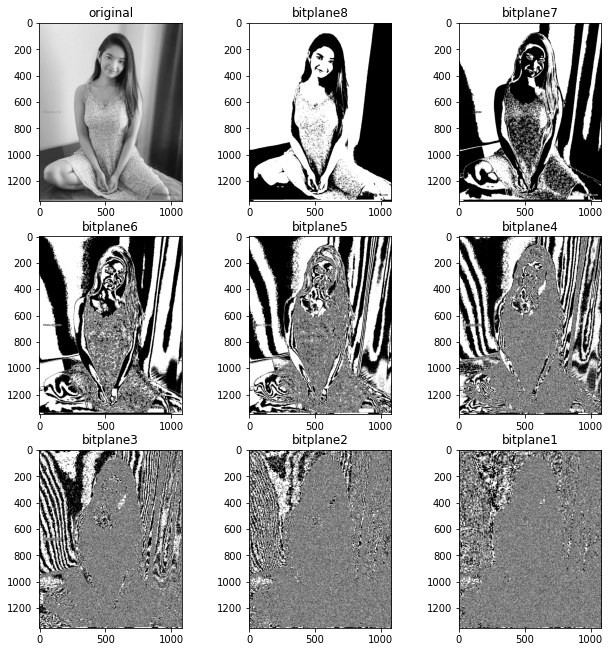

In [29]:
#showing the bitplanes into 3planes in a row.....
for i in range(len(images)):
    plt.subplot(3,3,i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray')
    plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2)

In [30]:
#readinf the image height and width
print(pic.shape)

(1350, 1080)


Matrix of the original image

In [31]:
print (pic)

[[214 215 216 ...  79  94  40]
 [215 216 217 ...  80  95  41]
 [216 217 218 ...  80  96  42]
 ...
 [121 121 121 ... 124 118  38]
 [121 121 121 ... 124 118  38]
 [121 121 121 ... 124 118  38]]


Entropy of the image

In [32]:
#lets define the entropy of this images
def entropy(im):
    p =ny.array([(im--v).sum() for v in range (256)])
    p= p/p.sum()
#compute e= -sum(p(si)*log2(p(si))
    e=-(p*ny.log2(p)).sum()
    return e

Entropy of the original image

In [33]:
entropy(pic)

7.9459479879791814

In [34]:
diffusion_range = 5
cccbg = CCCBG(.5, .7)

mats = []
for i in range(diffusion_range):
    images[i] = cv.bitwise_xor(cccbg.generateMatrix(height, width), images[i])
    mats.append(cccbg.generateMatrix(height, width))

In [35]:
print (mats)

[array([[1, 0, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 1, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 1]], dtype=uint8), array([[0, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 1, 0]], dtype=uint8), array([[0, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 0, 0]], dtype=uint8), array([[1, 1, 0, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 1, 1]], dtype=uint8), array([[1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0

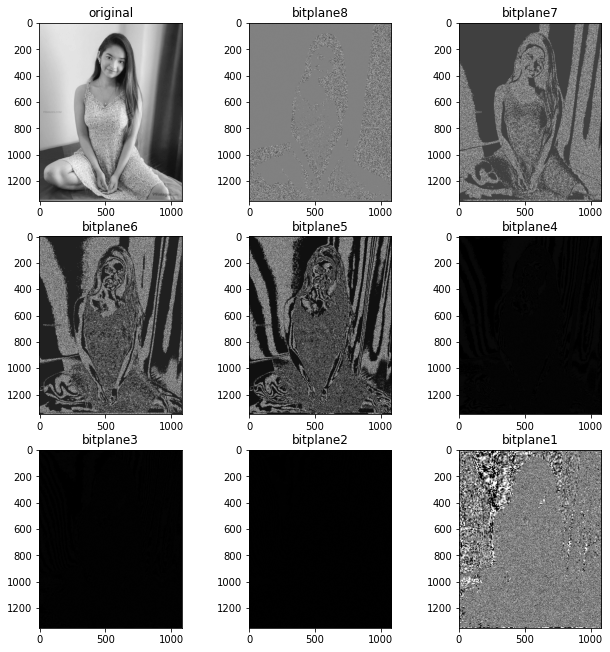

In [36]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.title(titles[i])
    plt.imshow(convert_to_255(images[i]), cmap='gray', vmin=0, vmax=255)
plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2) 

In [37]:
cipher_image = cipher_image_composition(images, height, width)
plt.title('cipher image')
plt.imshow(cipher_image, cmap='gray')


TypeError: int() can't convert non-string with explicit base

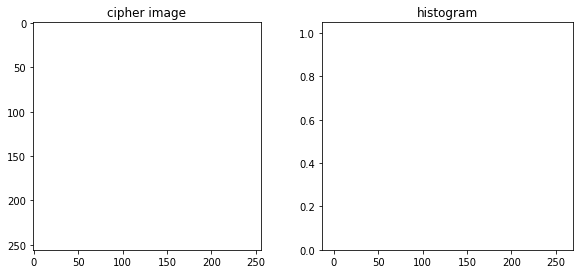

In [ ]:
# histogram analysis
plt.subplot(1,2,1)
plt.title('cipher image')
plt.imshow(cipher_image, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title('histogram')
plt.hist(cipher_image.ravel(), 256, [0,256])
plt.subplots_adjust(bottom=.01, right=1.4, top=.8)

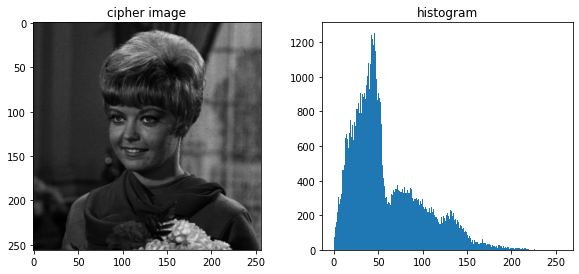

In [ ]:
# histogram analysis
plt.subplot(1,2,1)
plt.title('cipher image')
plt.imshow(pic, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title('histogram')
plt.hist(pic.ravel(), 256, [0,256])
plt.subplots_adjust(bottom=.01, right=1.4, top=.8)